<a href="https://colab.research.google.com/github/Sandanu87/Nextgen-Analytics-/blob/main/KNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data.csv


In [3]:
data = pd.read_csv('cleaned_data.csv')

In [4]:
data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4.0,7257.60
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1.0,8657.32
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4.0,12925.44
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4.0,13114.36
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4.0,13659.03


In [5]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
encoded_data = encode.fit_transform(data['outlet_city'])

encoded_df = pd.DataFrame(encoded_data, columns=['outlet_city_encoded'])
data = pd.concat([data, encoded_df], axis=1)
data = data.drop('outlet_city', axis=1)

In [6]:
data.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,outlet_city_encoded
0,10493832.0,1209.60,756.00,5292.00,4.0,7257.60,11
1,10178643.0,1590.12,1060.08,6007.12,1.0,8657.32,13
2,10513916.0,2288.88,1481.04,9155.52,4.0,12925.44,19
3,10334589.0,2274.94,1739.66,9099.76,4.0,13114.36,19
4,10458365.0,2345.49,2069.55,9243.99,4.0,13659.03,11


In [7]:
x = data.drop('cluster_catgeory', axis=1)
y = data['cluster_catgeory']

In [8]:
print(x.shape)
print(y.shape)

(774146, 6)
(774146,)


In [9]:
#spliting the dataset into train and test data subsets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
print('x_train', x_train.shape)
print('x_test', x_test.shape)

x_train (541902, 6)
x_test (232244, 6)


In [11]:
from sklearn.preprocessing import RobustScaler

numeric_features = ['dry_sales', 'luxury_sales', 'fresh_sales', 'total_sales']

x_train_log = np.log1p(x_train[numeric_features])
x_test_log = np.log1p(x_test[numeric_features])

scaler = RobustScaler()

scaled_x_train = scaler.fit_transform(x_train_log)
scaled_x_test = scaler.transform(x_test_log)

x_train_scaled = pd.DataFrame(scaled_x_train, columns=numeric_features, index=x_train.index)
x_test_scaled = pd.DataFrame(scaled_x_test, columns=numeric_features, index=x_test.index)

x_train_final = pd.concat([x_train.drop(columns=numeric_features), x_train_scaled], axis=1)
x_test_final = pd.concat([x_test.drop(columns=numeric_features), x_test_scaled], axis=1)

In [12]:
x_train_final.head()

,Customer_ID,outlet_city_encoded,dry_sales,luxury_sales,fresh_sales,total_sales
281861,10060471.0,5,-0.294101,-0.057959,0.704421,0.363369
413617,10461541.0,10,0.553173,-0.422998,-0.362840,0.092491
543369,10074813.0,1,0.308461,-0.739198,-0.530744,-0.448926
379833,10260411.0,6,0.225391,-1.238522,-0.595485,-0.688784
244544,10153591.0,16,-0.543606,-0.406382,0.574062,-0.024162


In [13]:
x_test_final.head()

,Customer_ID,outlet_city_encoded,dry_sales,luxury_sales,fresh_sales,total_sales
325438,10314224.0,16,-0.433085,-0.397439,0.639759,0.140659
256814,10641484.0,5,-0.457296,-0.281277,0.533306,-0.038828
256952,10470824.0,19,-1.011471,-1.253721,0.040008,-1.285136
353046,10739673.0,11,-0.085676,0.953855,-0.009807,-0.162011
620966,10707896.0,4,-0.866355,-0.552816,0.281778,-0.687051


kNN model

In [14]:
#building and training the knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train_final, y_train)

KNeighborsClassifier(n_neighbors=6)

In [15]:
#performing predictions on the test data
y_pred = knn.predict(x_test_final)

In [16]:
#creating a dataframe for comparing actual and predicted results by knn model
compare_results_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [17]:
compare_results_knn.to_csv(r'/content/knn_pred_comparison.csv', index=True)
compare_results_knn

,Actual,Predicted
325438,2.0,1.0
256814,2.0,3.0
256952,2.0,2.0
353046,5.0,6.0
620966,6.0,1.0
...,...,...
369599,1.0,4.0
212939,2.0,4.0
154228,4.0,4.0
645126,6.0,1.0


In [18]:
#evaluating the kNN model’s test results
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.28      0.44      0.34     56695
         2.0       0.25      0.28      0.26     46519
         3.0       0.08      0.03      0.04     14672
         4.0       0.27      0.25      0.26     51732
         5.0       0.06      0.01      0.02     11862
         6.0       0.27      0.18      0.22     50764

    accuracy                           0.26    232244
   macro avg       0.20      0.20      0.19    232244
weighted avg       0.24      0.26      0.24    232244



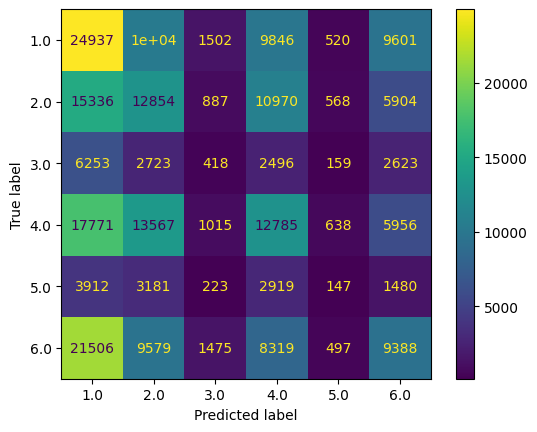

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#comparing actual values (y_test) vs predicted (y_pred) in test data
cm_knn = confusion_matrix(y_test, y_pred, labels = knn.classes_)

disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()

Text(0, 0.5, 'Mean Error')

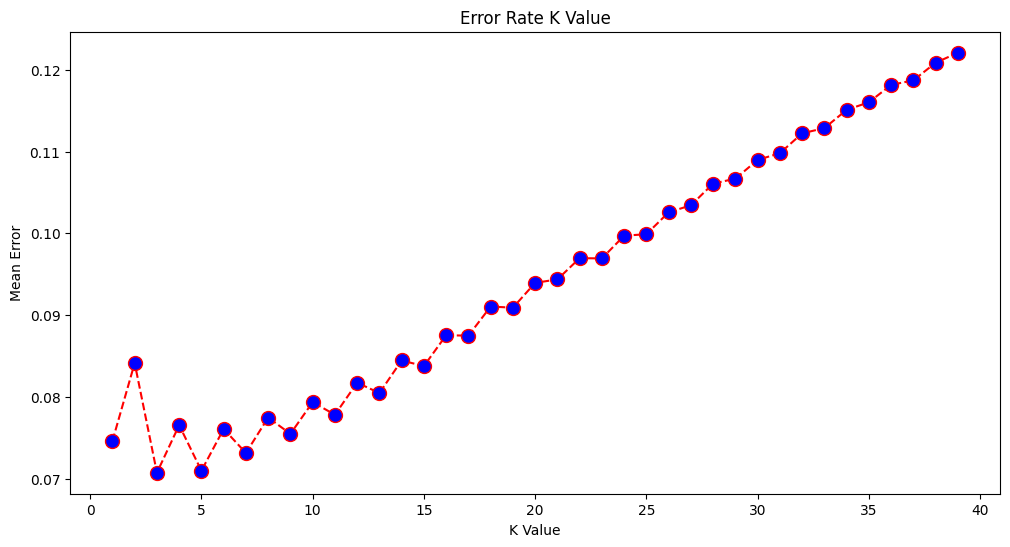

In [20]:
# Calculating error for K values between 1 and 40
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    pred_i = knn2.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [21]:
#Rebuilding KNN classifier
knn3 = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn3.fit(x_train,y_train)
#Performing predictions on the test data
y_pred=knn3.predict(x_test)

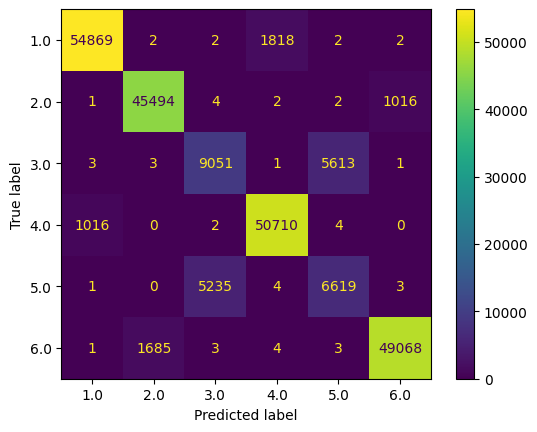

In [22]:
cm_knn3 = confusion_matrix(y_test, y_pred, labels = knn3.classes_)
disp_knn3_cm = ConfusionMatrixDisplay(cm_knn3, display_labels=knn3.classes_)
disp_knn3_cm.plot()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97     56695
         2.0       0.96      0.98      0.97     46519
         3.0       0.63      0.62      0.62     14672
         4.0       0.97      0.98      0.97     51732
         5.0       0.54      0.56      0.55     11862
         6.0       0.98      0.97      0.97     50764

    accuracy                           0.93    232244
   macro avg       0.84      0.84      0.84    232244
weighted avg       0.93      0.93      0.93    232244



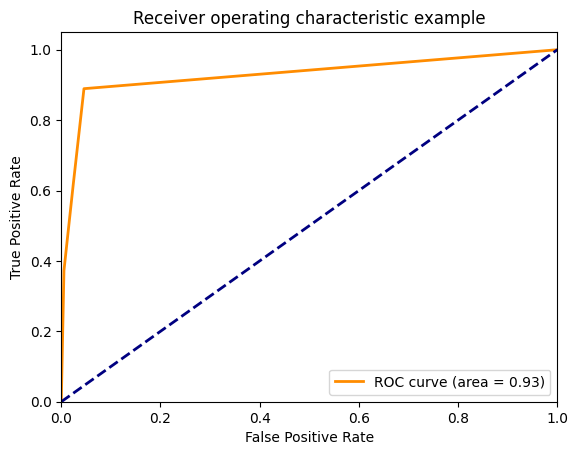

In [24]:
!pip install scikit-learn
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Binarize the output
y_test_bin = label_binarize(y_test, classes=knn3.classes_)
n_classes = y_test_bin.shape[1]

# One-vs-Rest classifier
classifier = OneVsRestClassifier(knn3)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for a specific class (e.g., class 0)
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors and distances
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring = 'roc_auc')
#fit model to data
knn_gscv.fit(x_train_final, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/us

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='roc_auc')

In [26]:
knn_gscv.best_params_

{'metric': 'euclidean', 'n_neighbors': np.int64(1)}

              precision    recall  f1-score   support

         1.0       0.30      0.30      0.30     56695
         2.0       0.26      0.26      0.26     46519
         3.0       0.09      0.08      0.08     14672
         4.0       0.28      0.29      0.29     51732
         5.0       0.07      0.07      0.07     11862
         6.0       0.28      0.27      0.28     50764

    accuracy                           0.26    232244
   macro avg       0.21      0.21      0.21    232244
weighted avg       0.26      0.26      0.26    232244



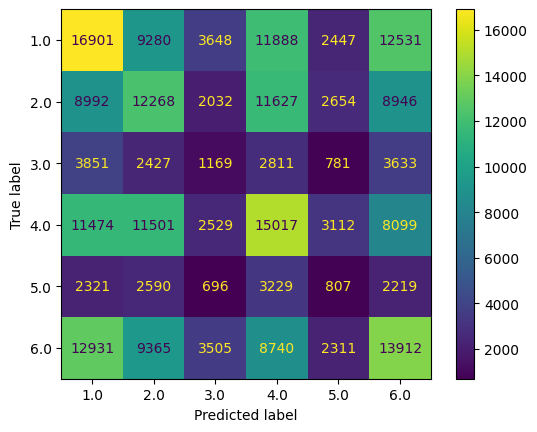

In [27]:
# Perform testing on test dataset
y_pred = knn_gscv.predict(x_test_final)
# Construct a confusion matrix
cm_knn_gscv = confusion_matrix(y_test, y_pred, labels = knn_gscv.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=knn_gscv.classes_)
disp_knn_gscv_cm.plot()
# Display the classification report
print(classification_report(y_test, y_pred))

In [28]:
from sklearn.metrics import accuracy_score
train_accuracy_gb = accuracy_score(y_train, best_gb_model.predict(x_train_final))
print("Training Accuracy:", train_accuracy_gb)

NameError: name 'best_gb_model' is not defined

In [ ]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes=knn_gscv.classes_) # Use knn_gscv.classes_
n_classes = y_test_bin.shape[1]

# One-vs-Rest classifier
classifier = OneVsRestClassifier(knn_gscv) # Use knn_gscv as the base estimator
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for a specific class (e.g., class 0)
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()